<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Body_Fat_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Building a body fat estimator using ML can have various practical uses, from helping individuals monitor their health to assisting healthcare professionals in assessing patients' body composition.**

List of features that can be used in Body Fat Estimator project. Here's a brief description of each feature:

**Density**: This is likely the body density of the individual, which is often measured using techniques like weighing. It's an important feature as it's directly related to body composition.

**BodyFat**: This is the target variable we want to predict - the body fat percentage of the individual.

**Age**: The age of the individual can be a relevant factor as body composition tends to change with age.

**Weight**: The individual's weight is a fundamental feature for estimating body fat percentage.

**Height**: Height is also an essential feature as it helps in calculating body mass index (BMI) and can be related to body fat.

**Neck**: Neck circumference is one of the body measurements used to estimate body fat percentage. It's often considered a good predictor.

**Chest**: Chest circumference is another measurement that can be useful in estimating body fat percentage, especially for men.

**Abdomen**: Abdominal circumference is a critical feature for estimating body fat, as fat tends to accumulate in this area.

**Hip**: Hip circumference is often considered in body fat estimation models, especially for women.

**Thigh**: Thigh circumference is another body measurement that can be informative for body fat estimation.

**Knee**: Knee circumference may be included in some models, though it's not as common as other measurements.

**Ankle**: Ankle circumference may be considered, but it's less common and might have a weaker correlation with body fat.

**Biceps**: Biceps circumference can be relevant, especially for estimating muscle mass.

**Forearm**: Forearm circumference is another measurement that can be used to assess muscle mass.

**Wrist**: Wrist circumference may be used in certain body fat estimation models, although it's not as commonly included as other measurements.




**Project Pipeline** :

The various steps involved in the Machine Learning Pipeline are :

1️⃣ Import Necessary Dependencies.

2️⃣ Read and Load the Dataset.

3️⃣ Exploratory Data Analysis.

4️⃣ Data Visualization of Target Variables.

5️⃣ Data Preprocessing.

6️⃣ Data Visualization after Preprocessing.

7️⃣ Splitting our data into Train and Test Subset.

8️⃣ Function for Model Evaluation.

9️⃣ Model Building.

1️⃣0️⃣Conclusion.

1️⃣ **Import Necessary Dependencies.**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2️⃣ **Read and Load the Dataset.**






In [ ]:
df = pd.read_csv('/content/bodyfat.csv')

In [ ]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

3️⃣ **Exploratory Data Analysis.**

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


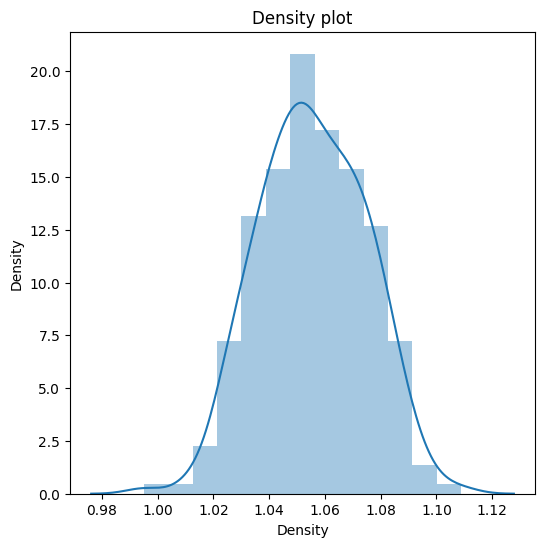

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


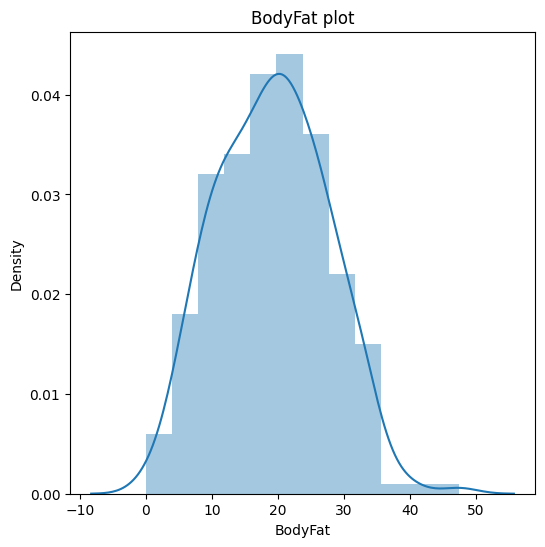

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


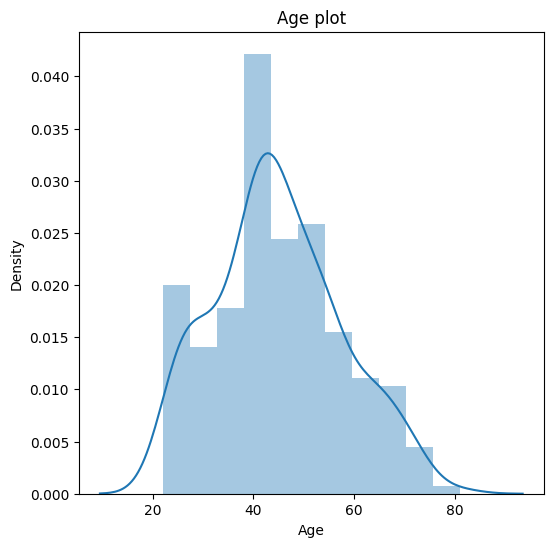

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


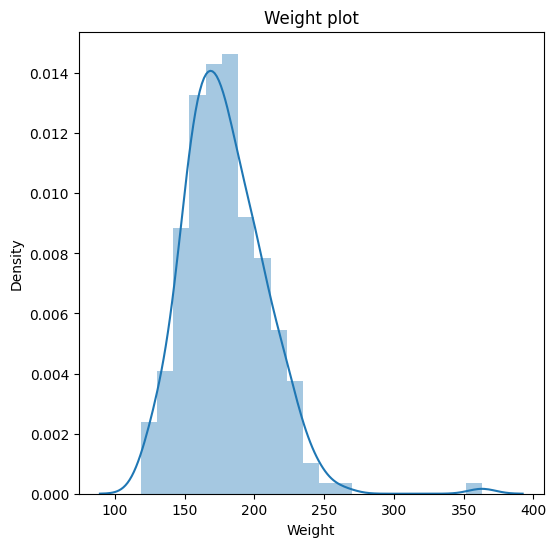

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


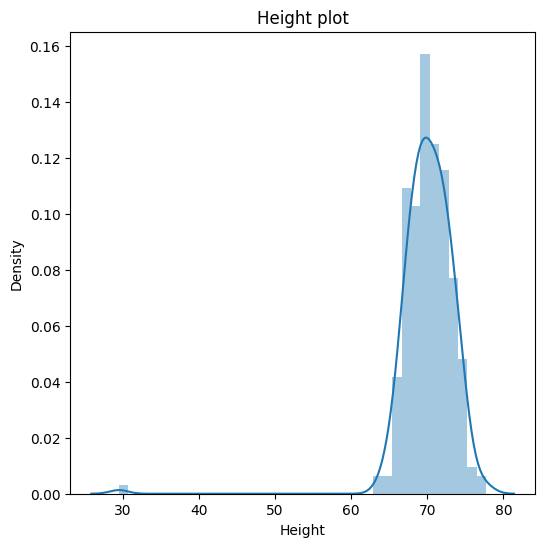

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


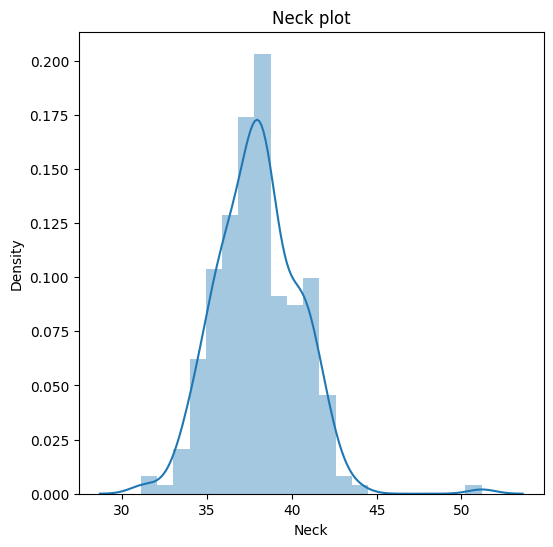

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


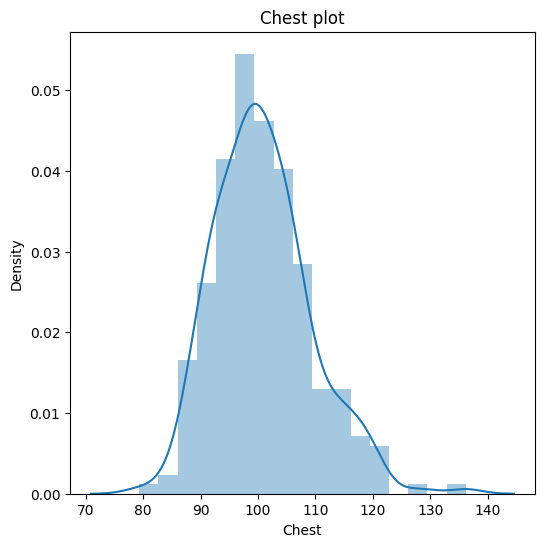

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


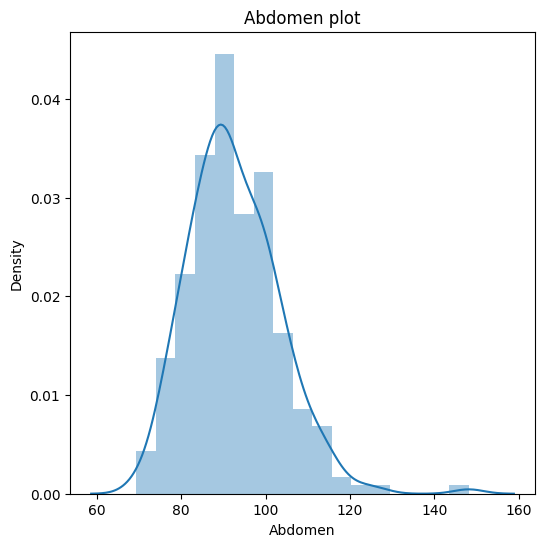

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


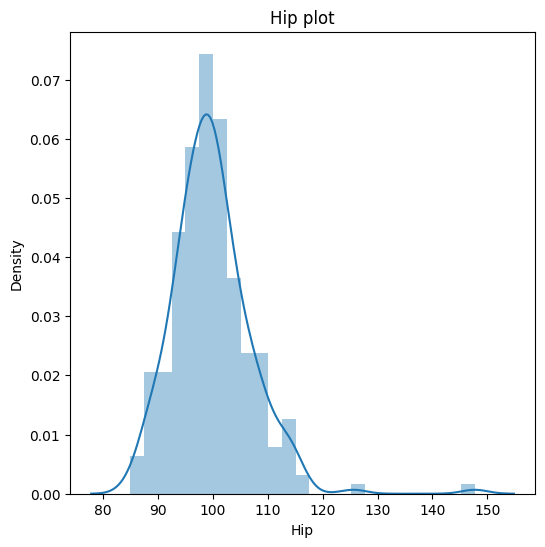

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


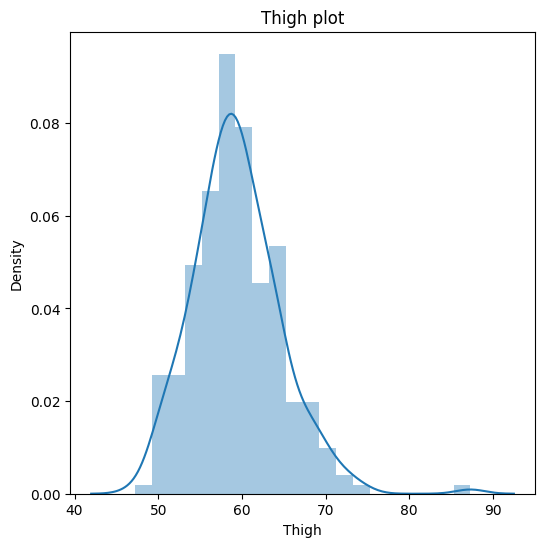

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


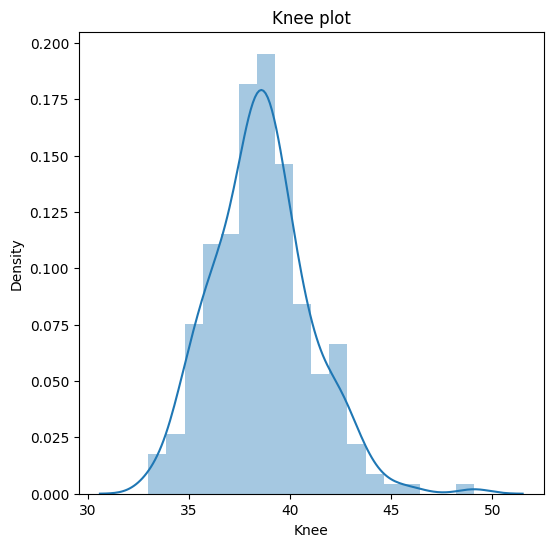

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


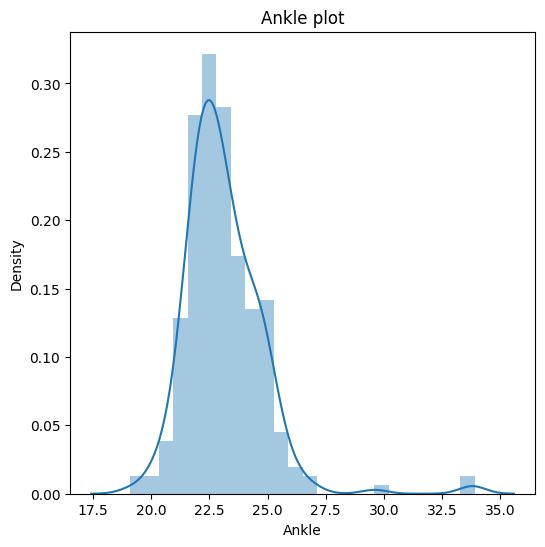

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


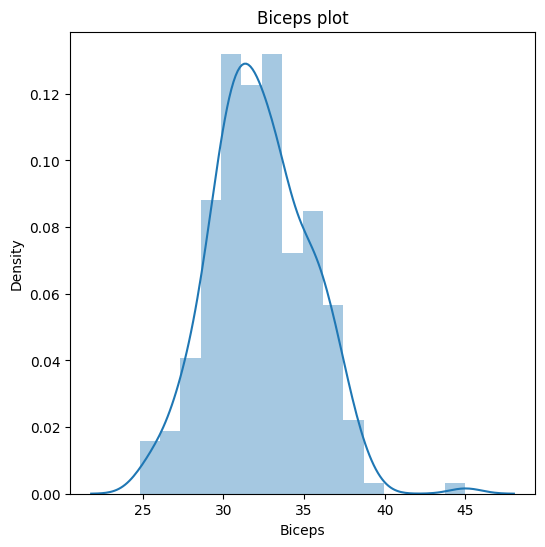

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


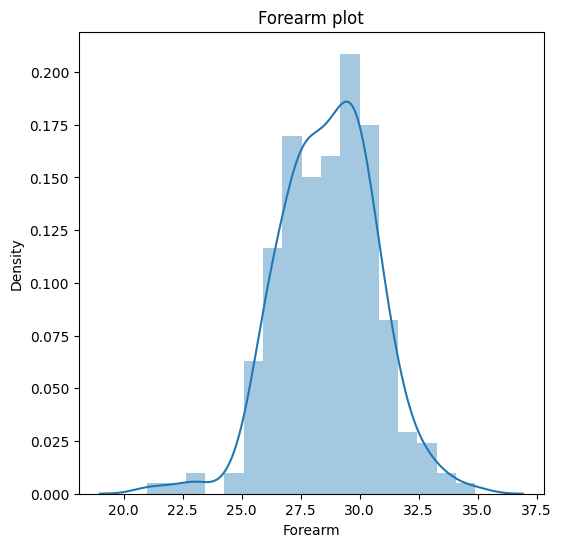

<ipython-input-47-1989cb8adf67>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


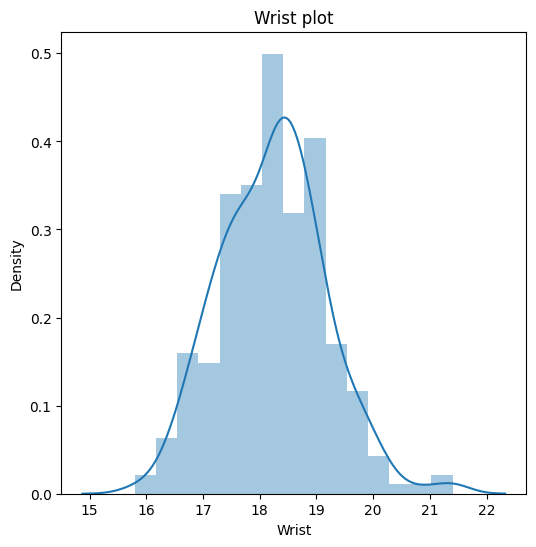

In [ ]:
for i in df.columns:
  plt.figure(figsize=(6,6))
  sns.distplot(df[i])
  plt.title(f'{i} plot')
  plt.show()

4️⃣ **Data Visualization of Target Variables.**


In [ ]:
import scipy.stats as stats

Distribution plot for the feature Density


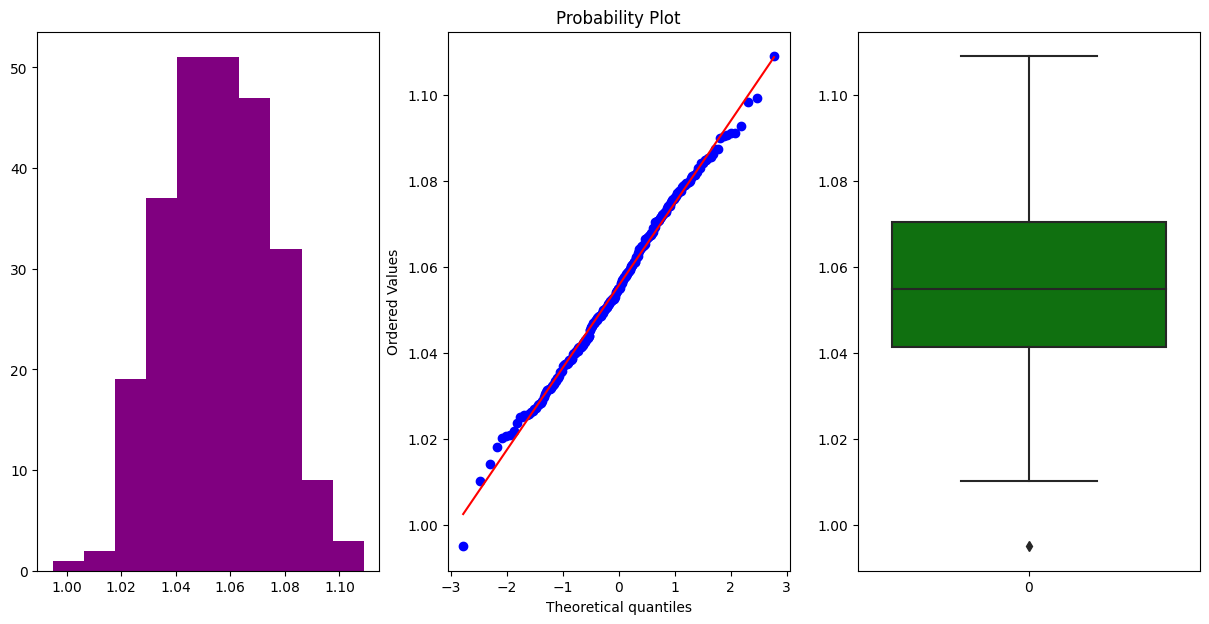

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature BodyFat


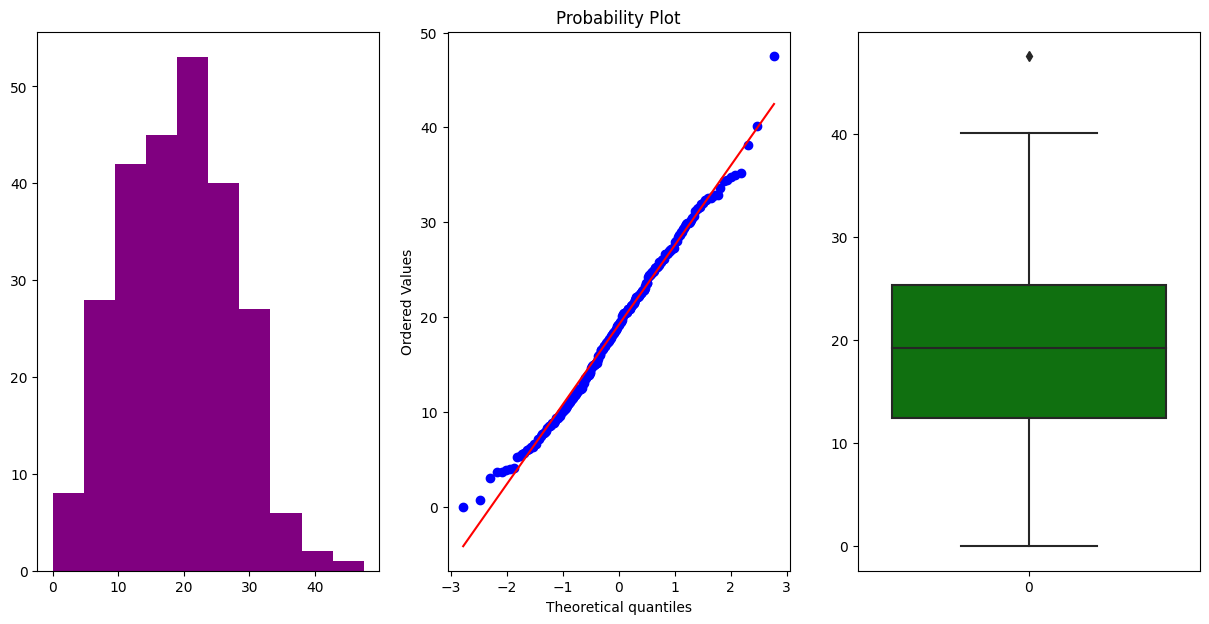

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Age


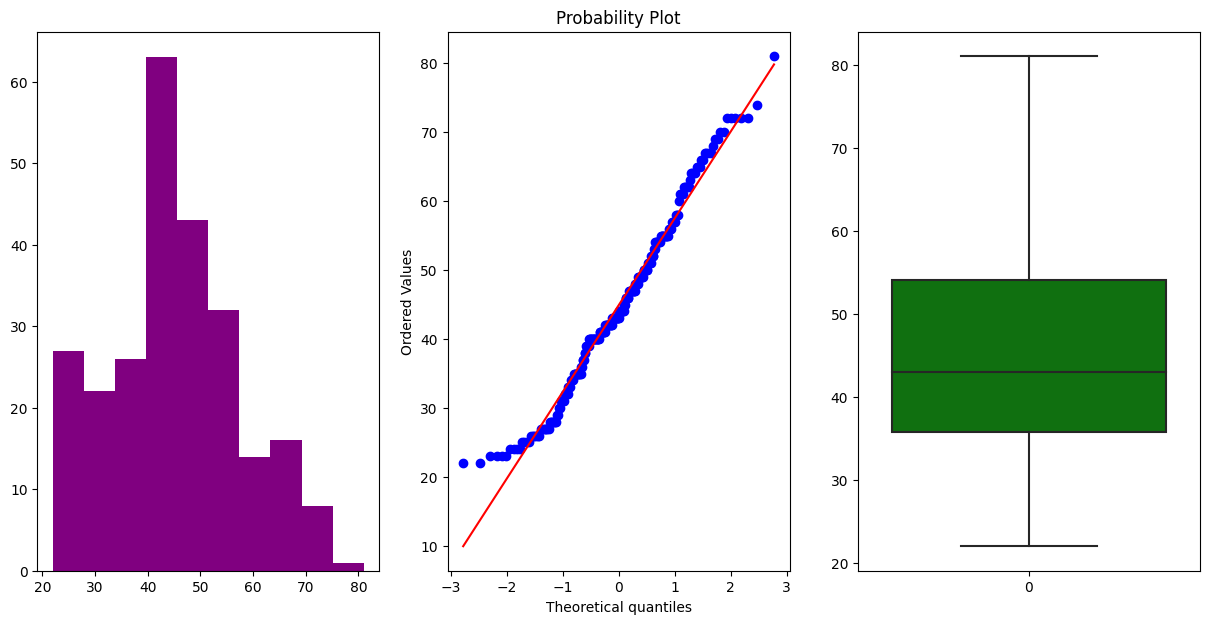

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Weight


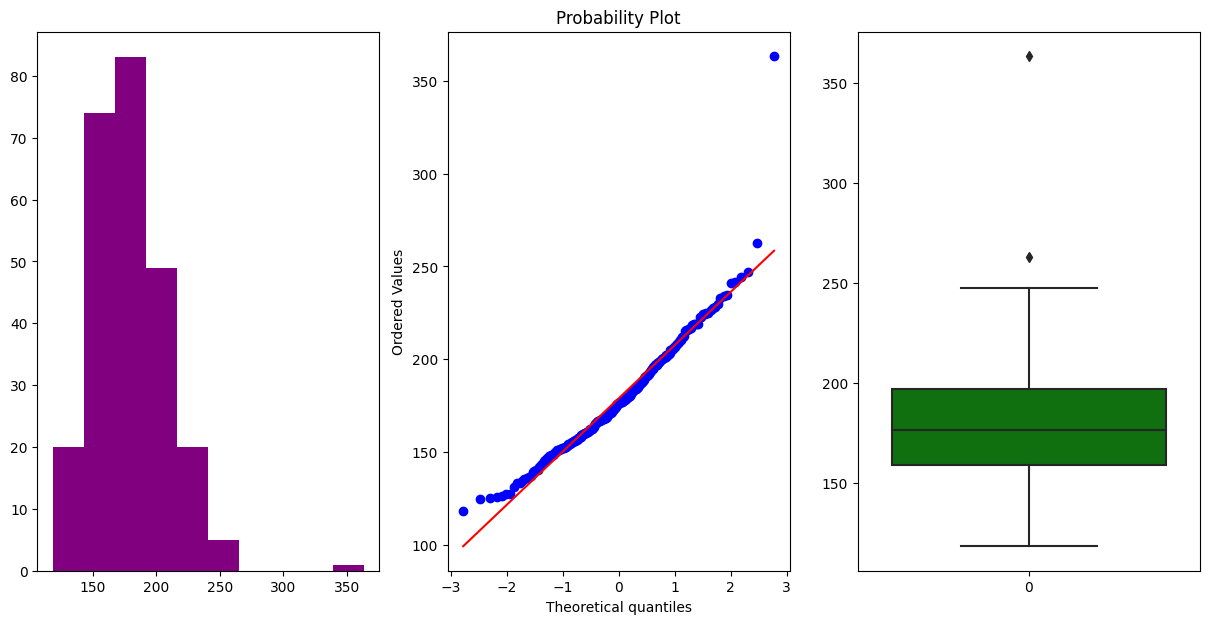

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Height


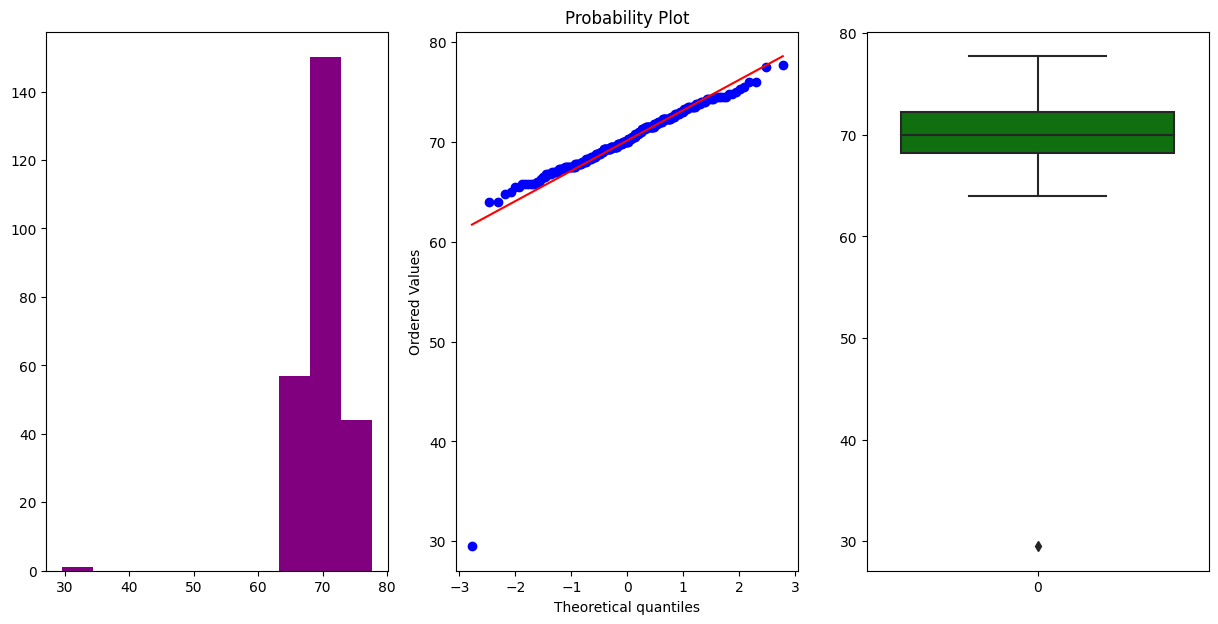

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Neck


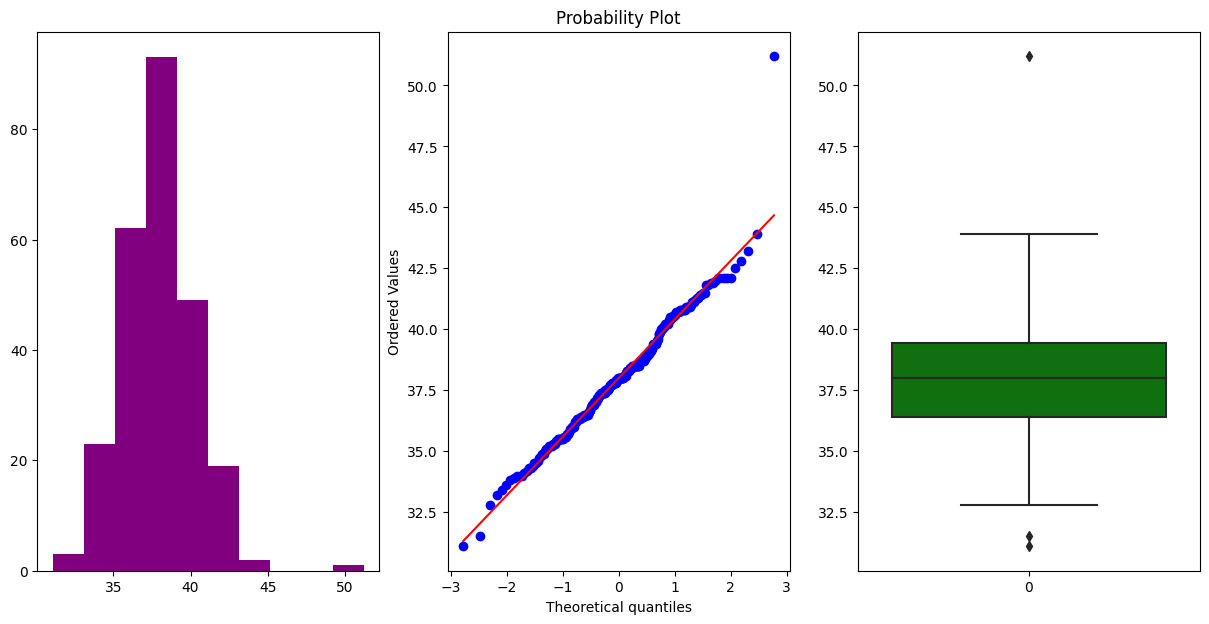

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Chest


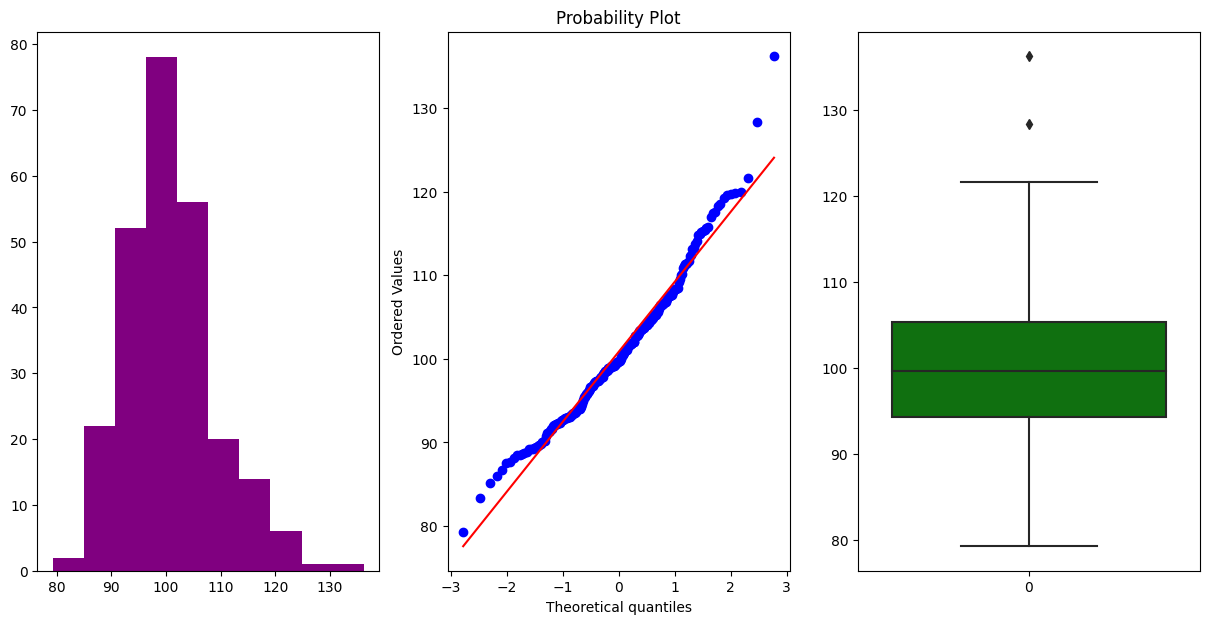

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Abdomen


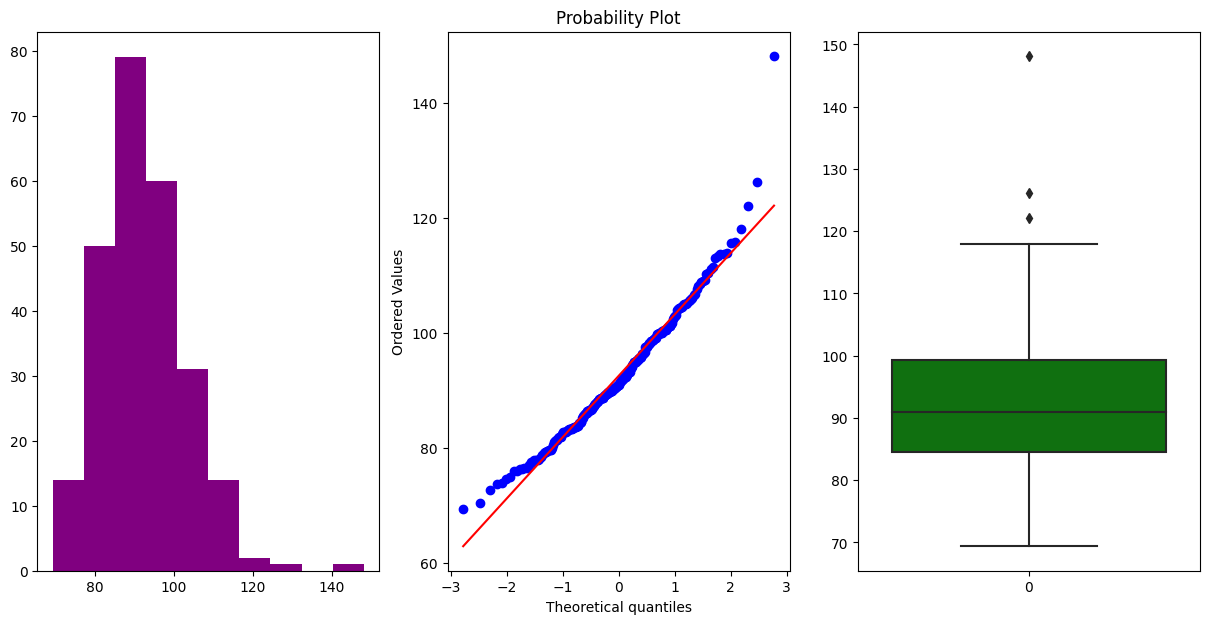

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Hip


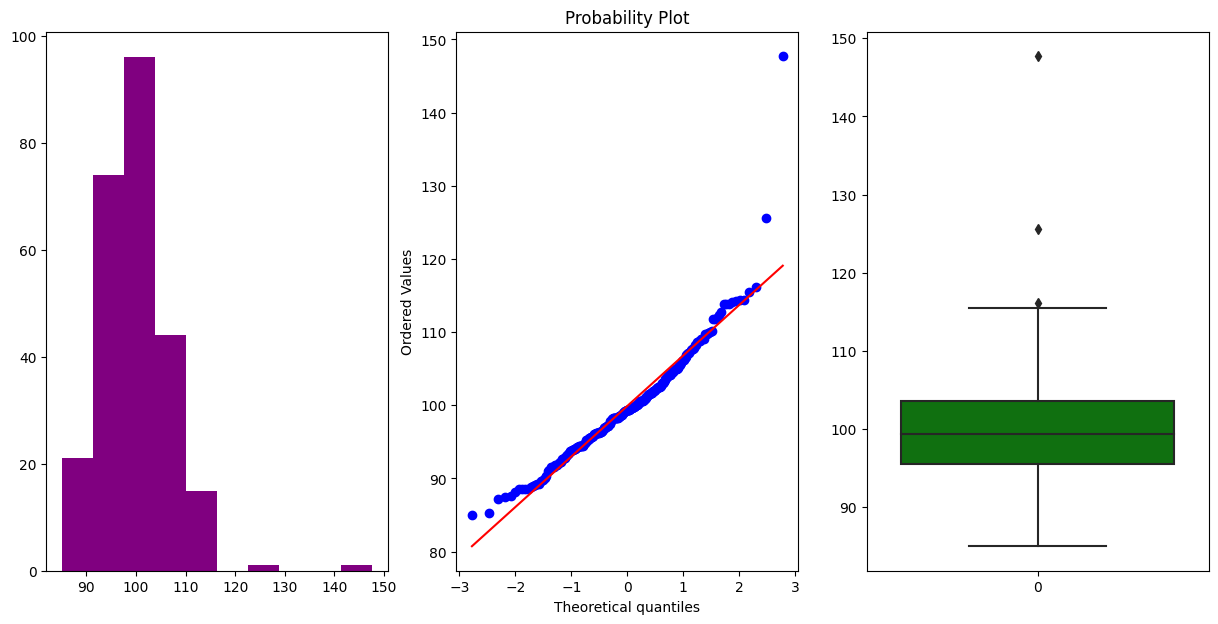

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Thigh


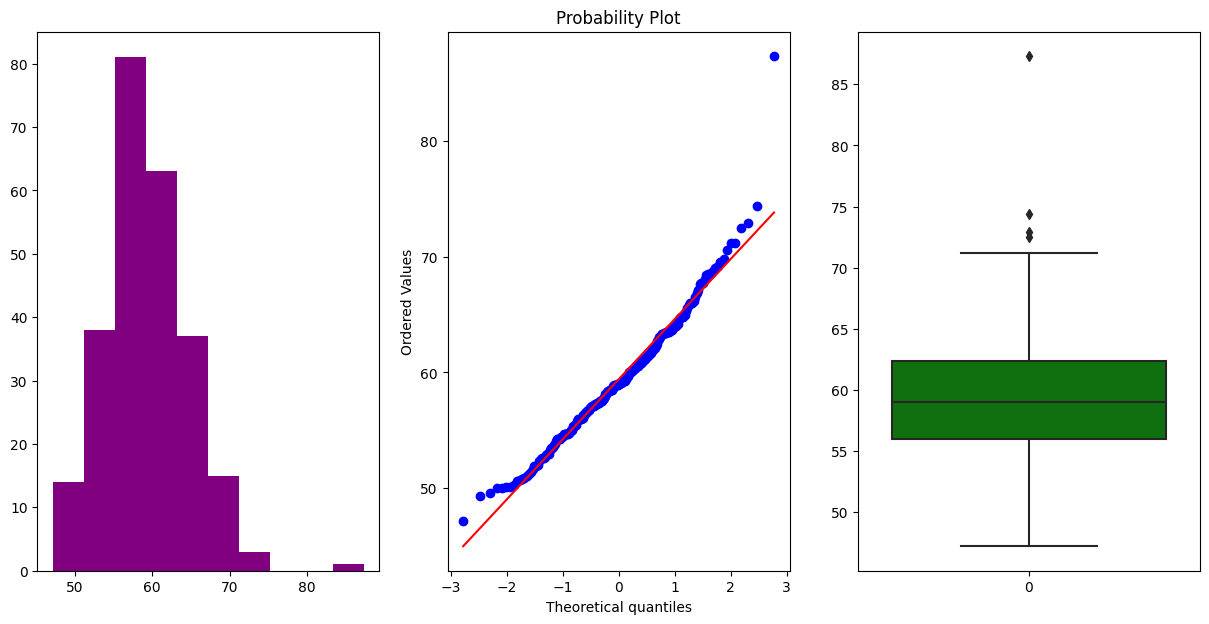

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Knee


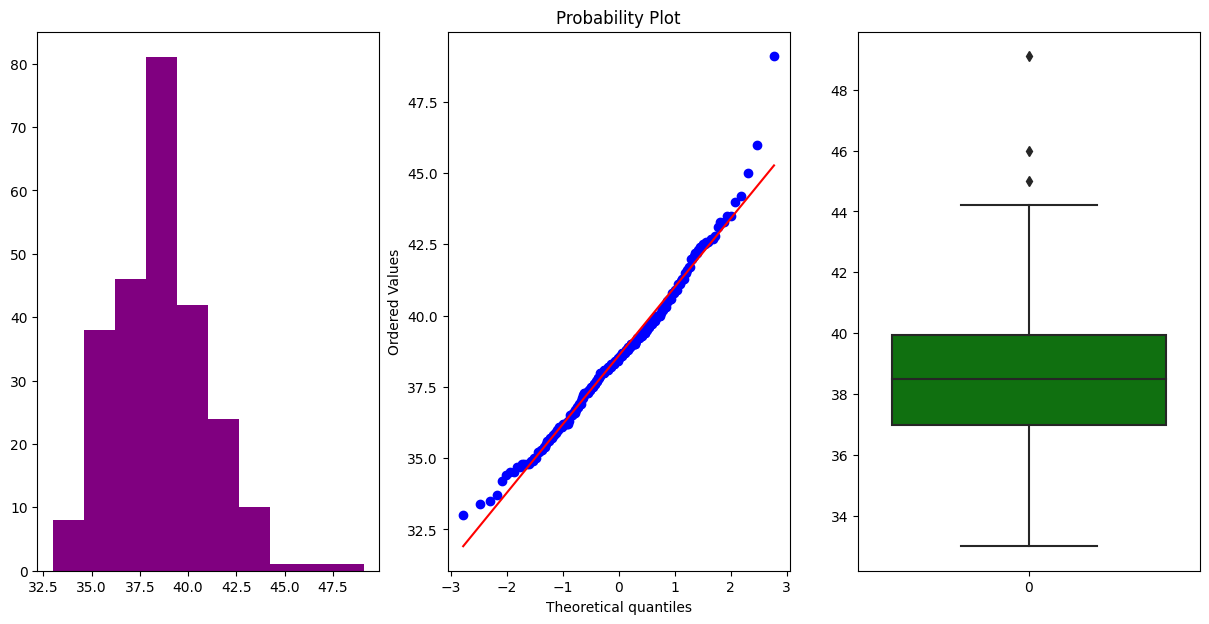

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Ankle


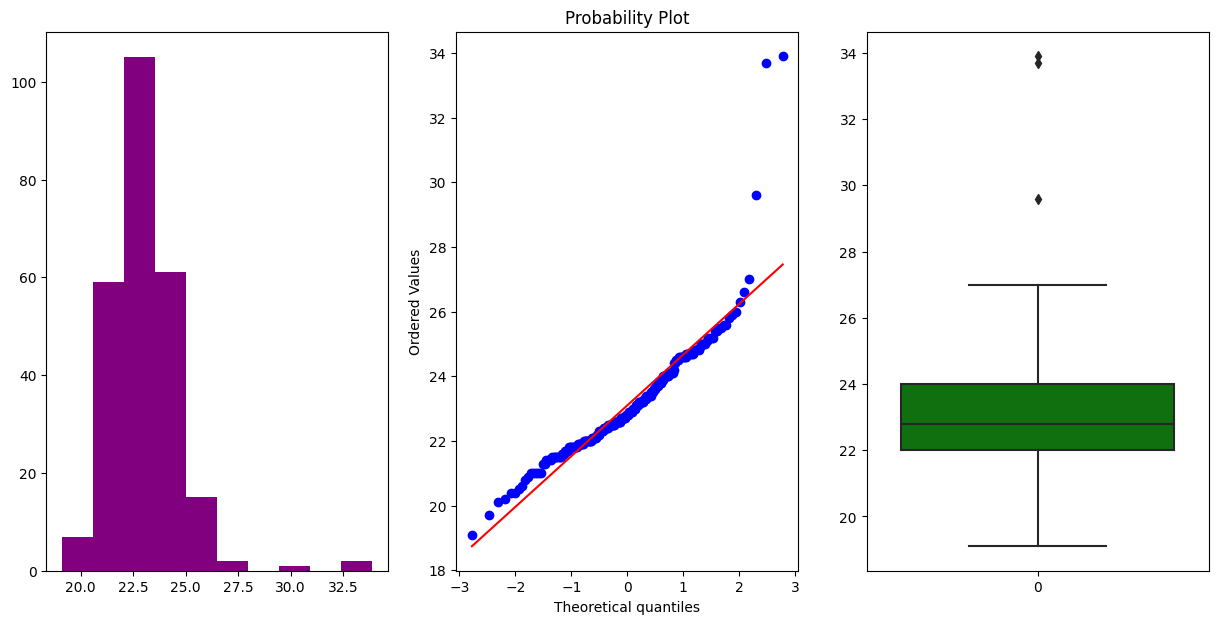

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Biceps


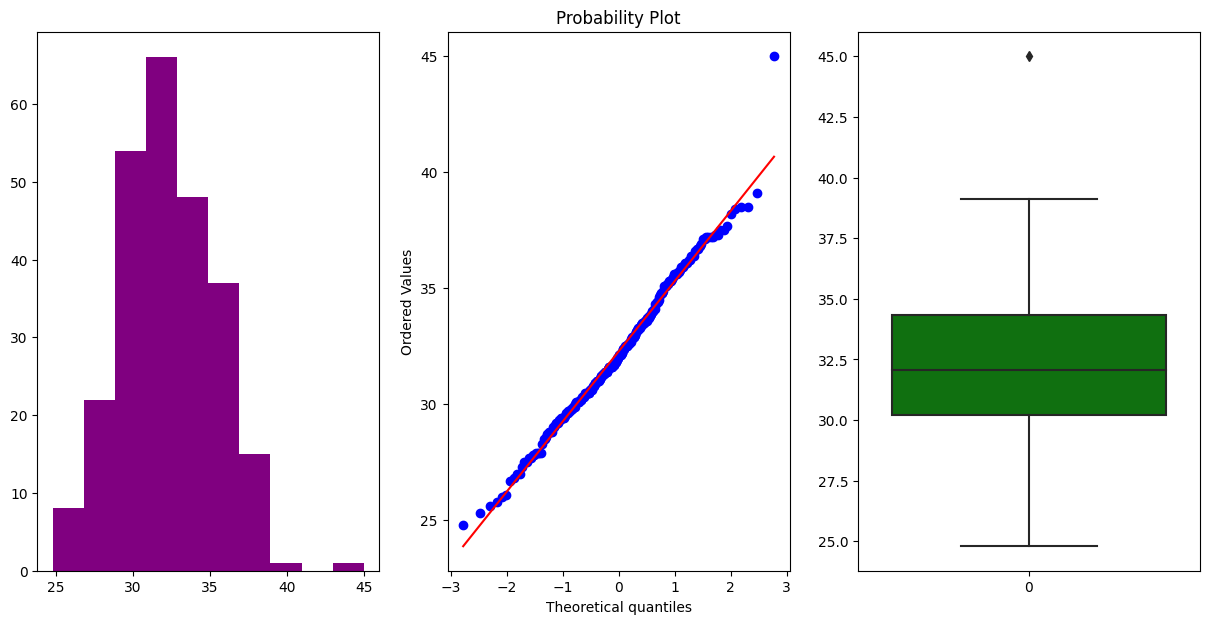

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Forearm


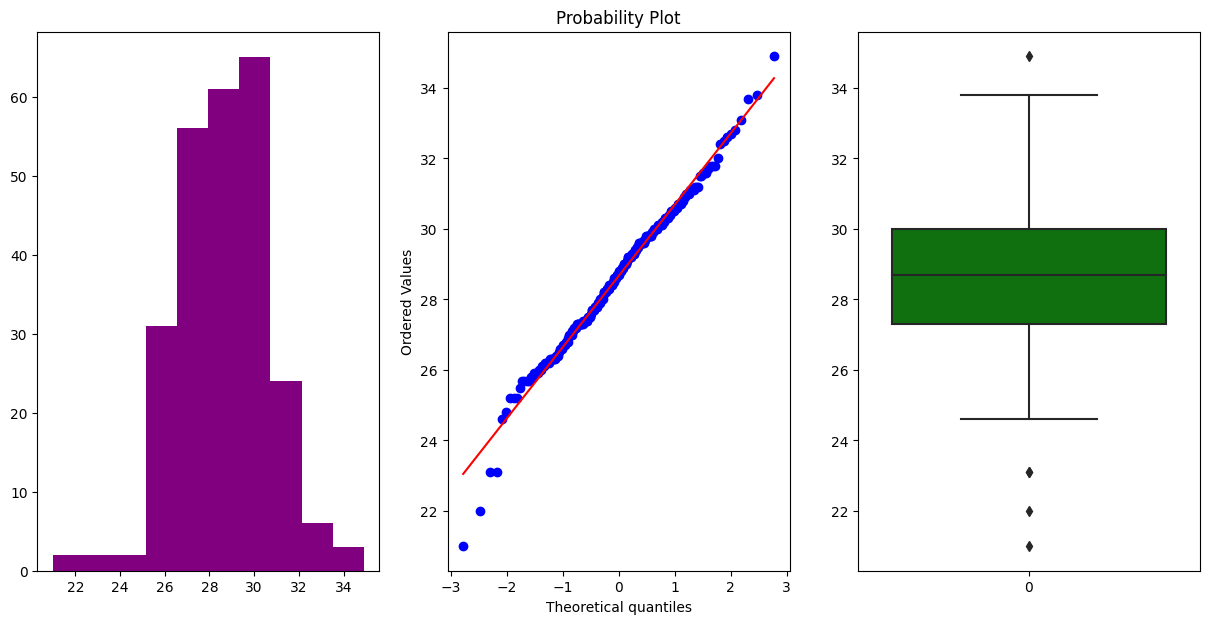

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Distribution plot for the feature Wrist


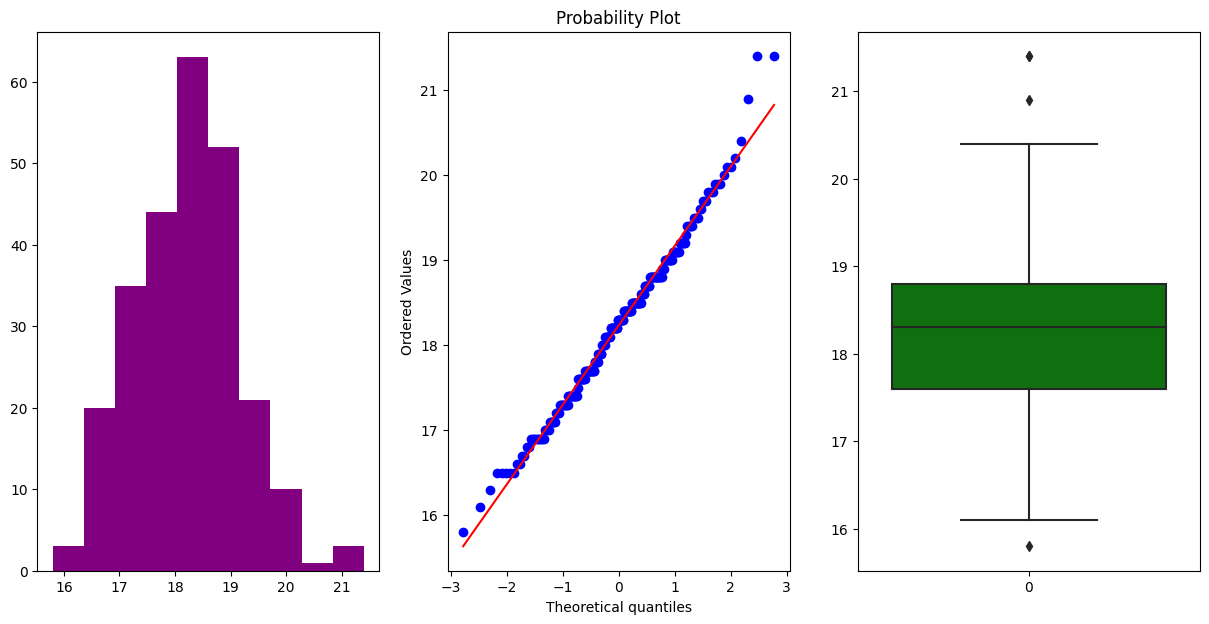

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
def plot(df, col):
  plt.figure(figsize=(15,7))
  plt.subplot(1,3,1)
  plt.hist(df[col], color='purple')

  plt.subplot(1,3,2)
  stats.probplot(df[col], dist='norm', plot=plt)

  plt.subplot(1,3,3)
  sns.boxplot(df[col], color = 'green')
  plt.show()

col = list(df.columns)
for i in range(len(col)):
  print(f'Distribution plot for the feature {col[i]}')
  plot(df,col[i])
  print('-'*160)


5️⃣ **Data Preprocessing.**

In [ ]:
# To remove Outliers
upperlimit = []
lowerlimit = []
for i in df.columns:
  upperlimit.append(df[i].mean()+(df[i].std())*4)
  lowerlimit.append(df[i].mean()-(df[i].std())*4)

In [ ]:
j = 0
for i in range(len(col)):
  tem = df.loc[(df[col[i]]>upperlimit[j]) | (df[col[i]]<lowerlimit[j])]
  j+=1

In [ ]:
tem # No outliers present

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


In [ ]:
# Using ExtraTree for feature extraction
data = df.copy
train = df.drop('BodyFat', axis = 1)
test = df['BodyFat']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(train,test)

ExtraTreesRegressor()

In [ ]:
et.feature_importances_

array([0.71963665, 0.00169376, 0.02130927, 0.00368148, 0.00153293,
       0.05478125, 0.1581174 , 0.01575447, 0.00645189, 0.00608192,
       0.00115045, 0.00651404, 0.00085103, 0.00244346])

In [ ]:
et.feature_names_in_

array(['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen',
       'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype=object)

6️⃣ **Data Visualization after Preprocessing.**

<Axes: >

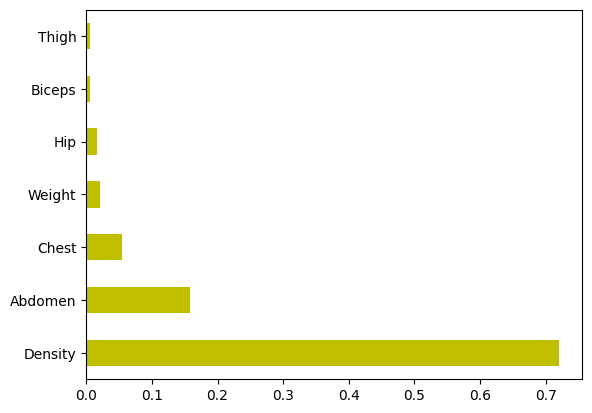

In [ ]:
series = pd.Series(et.feature_importances_, index = train.columns)
series.nlargest(7).plot(kind = 'barh', color = 'y')

In [ ]:
# Using mutual information gain for feature selection
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(train,test)

<Axes: >

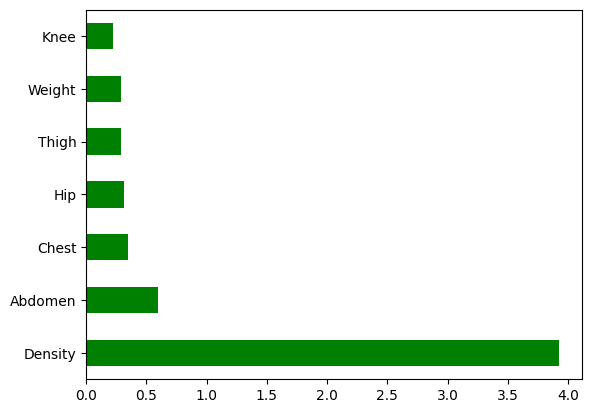

In [ ]:
series = pd.Series(mi, index = train.columns)
series.nlargest(7).plot(kind = 'barh', color = 'g')

<Axes: >

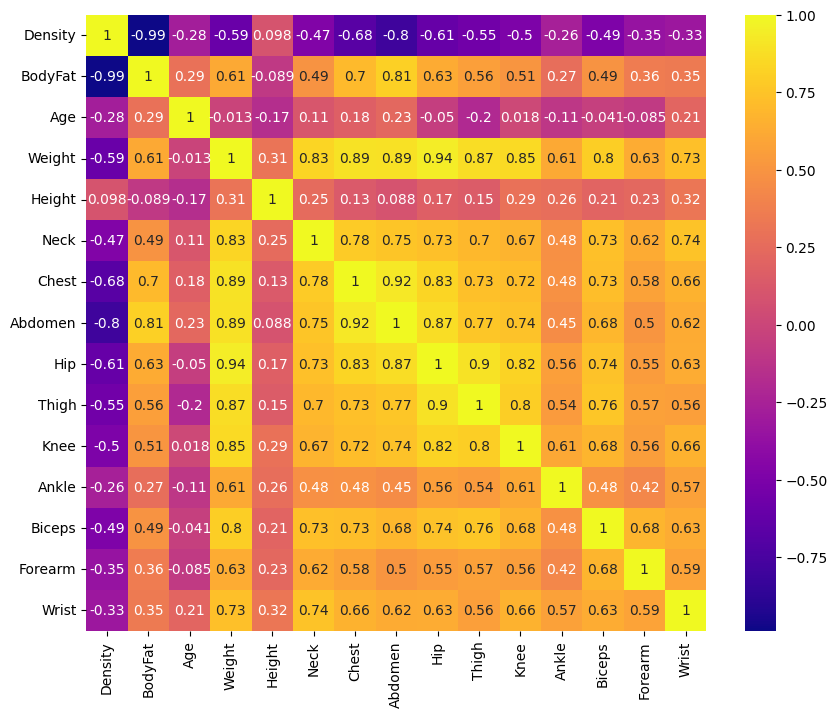

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap='plasma')

<Axes: >

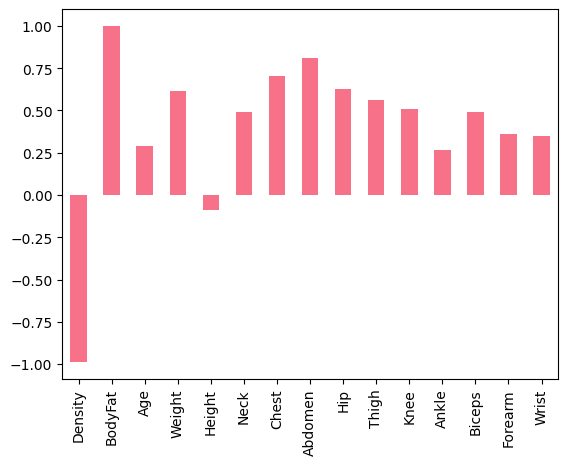

In [ ]:
sns.set_palette('husl')
df.corr()['BodyFat'].plot.bar()

In [ ]:
def correlation(df, threshold):
  colcor = set()
  cormat = df.corr()
  for i in range(len(cormat)):
    for j in range(i):
      if abs(cormat.iloc[i][j])>threshold:
        colname = cormat.columns[i]
        colcor.add(colname)
  return colcor

ans = correlation(train, threshold = 0.85)
ans

{'Abdomen', 'Chest', 'Hip', 'Knee', 'Thigh'}

7️⃣ **Splitting our data into Train and Test Subset.**

In [ ]:
X = df.drop('BodyFat',axis = 1)
y = df['BodyFat']

8️⃣ **Function for Model Evaluation.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

9️⃣ **Model Building.**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

99.14909437485507

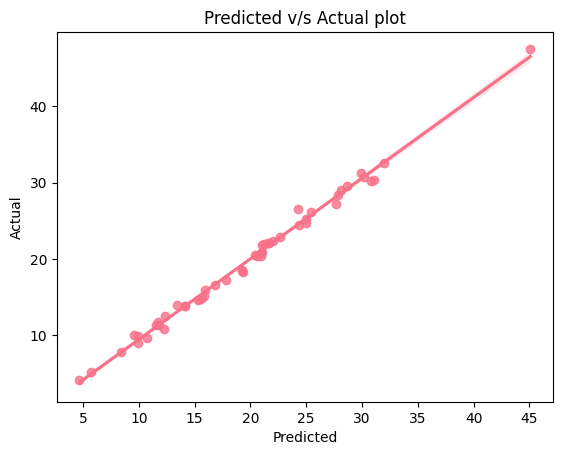

In [ ]:
sns.regplot(x = y_pred,y = y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted v/s Actual plot')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

90.66928289224163

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

96.45136519042708

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

94.27793572877097


1️⃣0️⃣Conclusion.

To develop your Body Fat Estimator model, we can use some or all of these features as input variables and train your machine learning model to predict the "BodyFat" feature based on the other measurements. Feature selection and engineering can help you determine which combination of features provides the best predictive power for our model. In this prediction Linear Regression performs very well.
